# Door Dash Delivery Prediction
## Introduction
This data project has been used as a take-home assignment in the recruitment process for the data science positions at DoorDash. The Dataset has been obtained from Stratascratch.com.

In recent years, the popularity of food delivery services has grown significantly, and DoorDash has emerged as a leading player in this market. As more and more people rely on DoorDash to get their meals delivered, it becomes increasingly important for the company to ensure timely deliveries to maintain customer satisfaction. One key factor that affects customer satisfaction is the delivery duration, which refers to the time it takes for the DoorDash driver to pick up the food from the restaurant and deliver it to the customer.

To improve the delivery duration and customer satisfaction, DoorDash can leverage data science techniques to predict the delivery duration accurately. This data science project aims to develop a predictive model that can estimate the delivery duration of DoorDash orders based on various factors as we will explore below.

## 1. Exploratory Data Analysis & Data Preprocessing
### 1.1 Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime as dt

In [2]:
historical_data = pd.read_csv('C:\\Users\\Jayesh\\Dropbox\\Data Science and Machine Learning\\Datasets\\historical_data.csv')

In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

### 1.2 Dealing with missing values

In [4]:
historical_data.dropna(inplace=True)
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175777 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_id                                      175777 non-null  int64  
 4   store_primary_category                        175777 non-null  object 
 5   order_protocol                                175777 non-null  float64
 6   total_items                                   175777 non-null  int64  
 7   subtotal                                      175777 non-null  int64  
 8   num_distinct_items                            175777 non-null  int64  
 9   min_item_price                                17

In [5]:
historical_data['market_id'].value_counts()

2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: market_id, dtype: int64

In [6]:
historical_data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,2841,italian,1.0,3,4475,3,925,1825,4.0,1.0,1.0,446,542.0
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,2841,italian,1.0,3,4375,3,1325,1625,6.0,4.0,3.0,446,789.0
18,1.0,2015-01-31 04:35:54,2015-01-31 05:47:30,2841,italian,1.0,2,3150,2,1425,1725,4.0,9.0,12.0,446,548.0
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,4139,mexican,1.0,2,950,2,150,700,24.0,24.0,26.0,446,212.0
20,1.0,2015-01-31 23:45:12,2015-02-01 00:14:05,4139,mexican,1.0,5,1285,3,150,400,12.0,13.0,11.0,446,424.0


### 1.3 Calculating the target variable values - "Actual Total Delivery Duration"

In [7]:
historical_data["created_at"] = pd.to_datetime(historical_data['created_at'])
historical_data["actual_delivery_time"] = pd.to_datetime(historical_data['actual_delivery_time'])
historical_data["actual_total_delivery_duration"] = (historical_data["actual_delivery_time"] - historical_data["created_at"]).dt.total_seconds()

(array([1.1464e+04, 2.5722e+04, 3.2896e+04, 2.3693e+04, 1.3248e+04,
        6.0780e+03, 1.2230e+03, 9.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8000e+01,
        5.0200e+02, 1.9360e+03, 3.0580e+03, 4.5140e+03, 1.2083e+04,
        1.3883e+04, 1.0219e+04, 7.8750e+03, 7.3340e+03]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

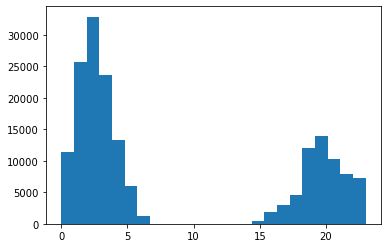

In [8]:
historical_data["hour_of_order"] = historical_data['created_at'].dt.hour
plt.hist(historical_data["hour_of_order"], bins = 24)

(array([0.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.300e+01,
        2.500e+01, 6.800e+01, 1.730e+02, 3.610e+02, 6.230e+02, 1.012e+03,
        1.594e+03, 2.236e+03, 2.913e+03, 3.892e+03, 4.601e+03, 5.458e+03,
        6.096e+03, 6.939e+03, 7.492e+03, 7.726e+03, 7.976e+03, 7.969e+03,
        8.137e+03, 7.804e+03, 7.576e+03, 7.311e+03, 6.860e+03, 6.381e+03,
        6.097e+03, 5.549e+03, 5.086e+03, 4.585e+03, 4.332e+03, 3.908e+03,
        3.584e+03, 3.216e+03, 2.948e+03, 2.572e+03, 2.343e+03, 2.103e+03,
        1.946e+03, 1.708e+03, 1.493e+03, 1.404e+03, 1.158e+03, 1.056e+03,
        9.550e+02, 8.510e+02, 8.170e+02, 6.990e+02, 5.820e+02, 5.410e+02,
        5.210e+02, 4.220e+02, 4.160e+02, 3.500e+02, 3.120e+02, 2.540e+02,
        2.150e+02, 1.980e+02, 2.190e+02, 1.990e+02, 1.680e+02, 1.460e+02,
        1.410e+02, 1.270e+02, 1.020e+02, 8.000e+01, 8.600e+01, 6.800e+01,
        6.300e+01, 6.500e+01, 6.000e+01, 5.600e+01, 4.700e+01, 5.000e+01,
        4.100e+01, 4.500e+01, 4.300e+0

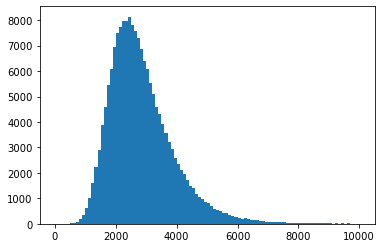

In [9]:
plt.hist(historical_data["actual_total_delivery_duration"], bins=100, range=(0,10000))

In [10]:
historical_data["actual_total_delivery_duration"].sort_values()

63294        101.0
862          223.0
30562        297.0
42507        321.0
117928       325.0
            ...   
86952      48178.0
190860     54447.0
83055      57032.0
27189     332482.0
185550    373879.0
Name: actual_total_delivery_duration, Length: 175777, dtype: float64

### 1.4 Dropping the outliers

In [11]:
historical_data.drop(historical_data[historical_data["actual_total_delivery_duration"]>8000].index, inplace=True)

In [12]:
historical_data['store_id'].value_counts()

6865    922
1311    848
314     804
1686    754
3937    710
       ... 
6711      1
6896      1
2802      1
3369      1
4075      1
Name: store_id, Length: 5640, dtype: int64

In [13]:
historical_data['store_id'].nunique()

5640

In [14]:
primary_cat = historical_data['store_primary_category'].value_counts()

### 1.5 Decreasing the number of categories of food

In [15]:
historical_data['store_primary_category'].nunique()

73

In [16]:
convert = primary_cat[40:]
historical_data['store_primary_category'] = historical_data['store_primary_category'].apply(lambda x: 'other' if x in convert else x)

In [17]:
historical_data['store_primary_category'].value_counts()

american             18135
pizza                15694
mexican              15555
burger                9881
sandwich              8971
chinese               8526
japanese              8187
dessert               8051
other                 6876
italian               6719
fast                  6476
indian                6358
thai                  6203
vietnamese            5559
mediterranean         5111
breakfast             4831
salad                 3462
greek                 2949
barbecue              2670
seafood               2583
asian                 2214
sushi                 2094
cafe                  2018
alcohol               1739
korean                1690
catering              1544
smoothie              1520
middle-eastern        1453
hawaiian              1447
steak                 1029
dim-sum                991
vegetarian             753
burmese                638
pasta                  624
persian                573
french                 556
latin-american         489
b

(array([84385., 57619., 20292.,  7188.,  2780.,  1312.,   642.,   370.,
          215.,   115.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

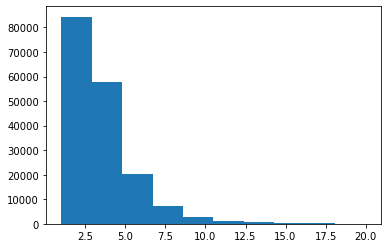

In [18]:
plt.hist(historical_data['total_items'], bins = 10, range = (1,20))

(array([ 2224., 20739., 29939., 27196., 22495., 18396., 13816., 10430.,
         7537.,  5620.,  3971.,  2971.,  2176.,  1733.,  1238.,  1013.,
          767.,   621.,   480.,   375.]),
 array([  100.,   595.,  1090.,  1585.,  2080.,  2575.,  3070.,  3565.,
         4060.,  4555.,  5050.,  5545.,  6040.,  6535.,  7030.,  7525.,
         8020.,  8515.,  9010.,  9505., 10000.]),
 <BarContainer object of 20 artists>)

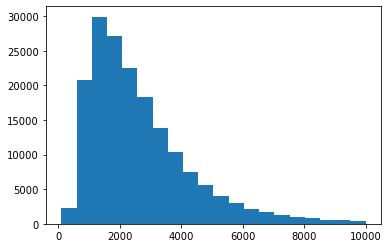

In [19]:
plt.hist(historical_data['subtotal'], bins = 20, range = (100,10000))

(array([9.6426e+04, 5.8032e+04, 1.5552e+04, 3.8450e+03, 9.9400e+02,
        2.8000e+02, 7.7000e+01, 1.8000e+01, 5.0000e+00, 2.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

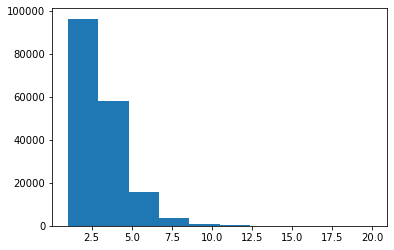

In [20]:
plt.hist(historical_data['num_distinct_items'], bins = 10, range = (1,20))

### 1.6 Creating new columns 

In [21]:
historical_data['total_available_dashers'] = historical_data['total_onshift_dashers'] - historical_data['total_busy_dashers']

In [22]:
len(historical_data[historical_data['total_available_dashers']<0])

39125

In [23]:
historical_data = historical_data.drop(columns = ['created_at', 'actual_delivery_time', 'store_id', 'total_onshift_dashers', 'total_busy_dashers'])

### 1.7 Creating Dummy Variables

In [24]:
market_id_dummies = pd.get_dummies(historical_data.market_id)
market_id_dummies = market_id_dummies.add_prefix('market_id_')

In [25]:
category_dummies = pd.get_dummies(historical_data.store_primary_category)
category_dummies = category_dummies.add_prefix('category_')

In [26]:
order_protocol_dummies = pd.get_dummies(historical_data.order_protocol)
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')

In [27]:
hour_dummies = pd.get_dummies(historical_data.hour_of_order)
hour_dummies = hour_dummies.add_prefix('hour_')

In [28]:
final_df = pd.concat([historical_data, market_id_dummies, category_dummies, order_protocol_dummies, hour_dummies], axis=1)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175231 entries, 0 to 197427
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175231 non-null  float64
 1   store_primary_category                        175231 non-null  object 
 2   order_protocol                                175231 non-null  float64
 3   total_items                                   175231 non-null  int64  
 4   subtotal                                      175231 non-null  int64  
 5   num_distinct_items                            175231 non-null  int64  
 6   min_item_price                                175231 non-null  int64  
 7   max_item_price                                175231 non-null  int64  
 8   total_outstanding_orders                      175231 non-null  float64
 9   estimated_order_place_duration                17

In [30]:
final_df = final_df.drop(columns = ['store_primary_category', 'order_protocol', 'market_id', 'hour_of_order'])

### 1.8 Collinearity

In [31]:
corr = final_df.corr()

In [32]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

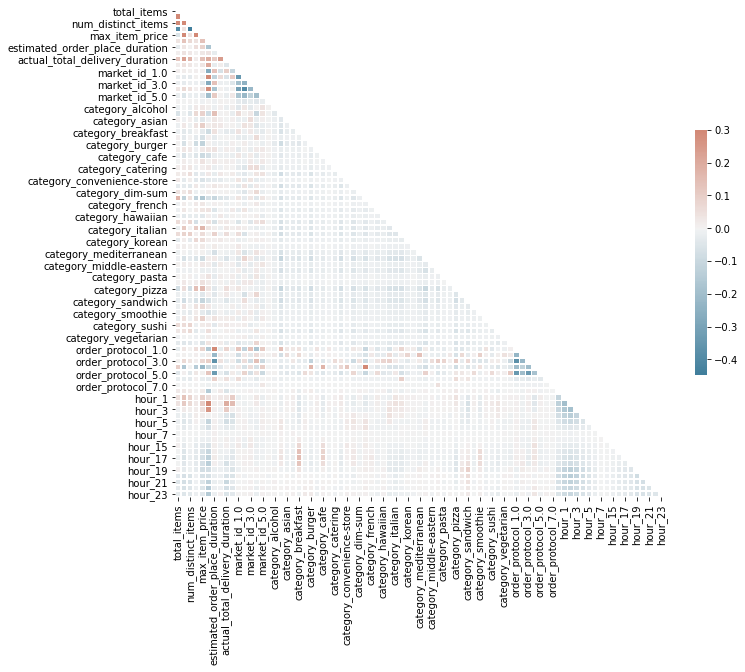

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
estimated_order_place_duration  order_protocol_1.0                0.900299
total_items                     num_distinct_items                0.758043
subtotal                        num_distinct_items                0.680874
                                total_items                       0.554702
min_item_price                  max_item_price                    0.540671
subtotal                        max_item_price                    0.509695
order_protocol_4.0              category_fast                     0.500683
min_item_price                  num_distinct_items                0.446896
market_id_2.0                   market_id_4.0                     0.395441
total_items                     min_item_price                    0.389630
order_protocol_1.0              order_protocol_3.0                0.373235
estimated_order_place_duration  order_protocol_3.0                0.363468
order_protocol_1.0       

In [35]:
final_df['ratio_of_items'] = final_df['num_distinct_items']/final_df['total_items']

In [36]:
final_df['average_price'] = (final_df['min_item_price'] + final_df['max_item_price'])/2

In [37]:
final_df["avg_price_per_item"] = final_df["subtotal"] / final_df["total_items"]

In [38]:
corr = final_df.corr()
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
avg_price_per_item              average_price                     0.926523
order_protocol_1.0              estimated_order_place_duration    0.900299
max_item_price                  average_price                     0.887450
average_price                   min_item_price                    0.867546
avg_price_per_item              min_item_price                    0.860059
                                max_item_price                    0.770109
num_distinct_items              total_items                       0.758043
subtotal                        num_distinct_items                0.680874
total_items                     subtotal                          0.554702
max_item_price                  min_item_price                    0.540671
subtotal                        max_item_price                    0.509695
order_protocol_4.0              category_fast                     0.500683
num_distinct_items       

In [39]:
final_df.drop(columns=['min_item_price', 'max_item_price', 'avg_price_per_item', 'num_distinct_items'], inplace=True)

In [40]:
corr = final_df.corr()
corr.abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

total_items                     total_items                       1.000000
order_protocol_1.0              estimated_order_place_duration    0.900299
total_items                     subtotal                          0.554702
category_fast                   order_protocol_4.0                0.500683
ratio_of_items                  total_items                       0.444523
market_id_2.0                   market_id_4.0                     0.395441
order_protocol_3.0              order_protocol_1.0                0.373235
                                estimated_order_place_duration    0.363468
order_protocol_5.0              order_protocol_1.0                0.342373
market_id_1.0                   market_id_2.0                     0.341755
order_protocol_3.0              order_protocol_5.0                0.336335
hour_2                          total_outstanding_orders          0.336319
estimated_order_place_duration  order_protocol_5.0                0.332745
subtotal                 

In [41]:
final_df = final_df.astype("float32")

In [42]:
features = final_df.drop(columns=["actual_total_delivery_duration"]).columns.to_list()

## 2. Modelling

### 2.1 Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
X = final_df[features]
y = final_df["actual_total_delivery_duration"]

In [45]:
scaler = MinMaxScaler()
scaler_fit = scaler.fit(final_df)
scaled = scaler_fit.transform(final_df)
scaled_df = pd.DataFrame(scaled, columns = final_df.columns)

In [46]:
scaled_df

,total_items,subtotal,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,total_available_dashers,market_id_1.0,market_id_2.0,market_id_3.0,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,ratio_of_items,average_price
0,0.007317,0.128396,0.092784,0.164273,0.495112,0.465864,0.553333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.061088
1,0.000000,0.070896,0.027491,0.164273,0.396780,0.496897,0.420000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.095238
2,0.007317,0.178022,0.082474,0.164273,0.166187,0.188094,0.440000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746921,0.082449
3,0.000000,0.056903,0.048110,0.164273,0.457159,0.275111,0.420000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.103741
4,0.002439,0.135075,0.044674,0.164273,0.117884,0.365674,0.426667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.123129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175226,0.004878,0.051828,0.099656,0.092449,0.190339,0.482077,0.426667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.033810
175227,0.012195,0.112313,0.068729,0.092449,0.526164,0.415706,0.433333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662562,0.041837
175228,0.009756,0.068507,0.158076,0.092449,0.457159,0.368208,0.413333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595074,0.023776
175229,0.000000,0.043843,0.061856,0.164273,0.220817,0.482077,0.426667,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.036395


In [47]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df[features], scaled_df['actual_total_delivery_duration'], test_size=0.2, random_state=42)

###  2.2 Measuring Importance of Features

In [48]:
from sklearn.ensemble import RandomForestRegressor

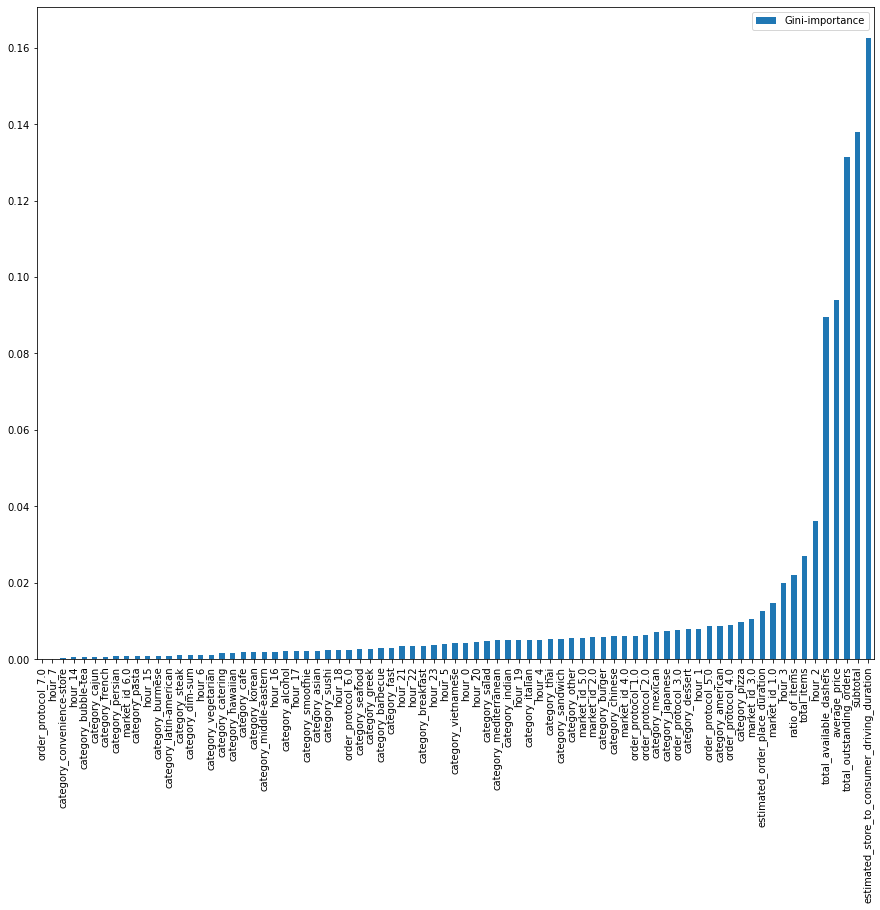

In [49]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()                                              

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA().fit(X_train)

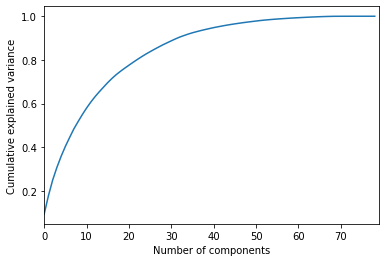

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,79,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### 2.3 Selecting the Models

In [53]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [55]:
models = {"Ridge" : Ridge(),
         "Decision Tree" : DecisionTreeRegressor(),
         "Random Forest" : RandomForestRegressor(),
         "XGBoost" : XGBRegressor(),
         "LightGBM" : LGBMRegressor(),
         "K Nearest Neighbors" : KNeighborsRegressor(),
         "Multi Layer Perceptron" : MLPRegressor()}

In [56]:
def train_model (X_train, X_test, y_train, y_test, model, model_name, scaler):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_predict1 = scaler.inverse_transform(y_predict.reshape(-1, 1))
    y_test1 = scaler.inverse_transform(y_test.values.reshape(-1, 1))
    test_error = mean_squared_error(y_test1, y_predict1, squared=False)
    print("Test error = "'{}'.format(test_error)+" in " + model_name)

### 2.4 Results
LightGBM and XGBoost give us the best results. Hyperparameter Tuning can be used to optimise the models further.

In [57]:
scaler = MinMaxScaler()
y_scaler = scaler.fit(final_df["actual_total_delivery_duration"].values.reshape(-1,1))
for model in models:
    train_model(X_train, X_test, y_train, y_test, models[model], model, y_scaler)

Test error = 907.1592407226562 in Ridge
Test error = 1256.132471132352 in Decision Tree
Test error = 884.6114455588254 in Random Forest
Test error = 867.0507202148438 in XGBoost
Test error = 866.5979004993342 in LightGBM
Test error = 968.1220703125 in K Nearest Neighbors
Test error = 886.8770141601562 in Multi Layer Perceptron


### 2.5 Neural Network using Tensor Flow

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError
import tensorflow as tf

In [59]:
model = tf.keras.Sequential()
model.add(Dense(40, input_dim = (len(features)), activation = 'relu'))

In [60]:
model.add(Dense(10, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

In [61]:
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

In [62]:
history = model.fit(X_train, y_train, epochs = 50, verbose = 2)

Epoch 1/50
4381/4381 - 5s - loss: 0.0147 - root_mean_squared_error: 0.1211 - 5s/epoch - 1ms/step
Epoch 2/50
4381/4381 - 5s - loss: 0.0134 - root_mean_squared_error: 0.1158 - 5s/epoch - 1ms/step
Epoch 3/50
4381/4381 - 4s - loss: 0.0132 - root_mean_squared_error: 0.1149 - 4s/epoch - 1ms/step
Epoch 4/50
4381/4381 - 5s - loss: 0.0131 - root_mean_squared_error: 0.1143 - 5s/epoch - 1ms/step
Epoch 5/50
4381/4381 - 5s - loss: 0.0130 - root_mean_squared_error: 0.1140 - 5s/epoch - 1ms/step
Epoch 6/50
4381/4381 - 4s - loss: 0.0129 - root_mean_squared_error: 0.1136 - 4s/epoch - 965us/step
Epoch 7/50
4381/4381 - 4s - loss: 0.0128 - root_mean_squared_error: 0.1133 - 4s/epoch - 995us/step
Epoch 8/50
4381/4381 - 4s - loss: 0.0128 - root_mean_squared_error: 0.1131 - 4s/epoch - 913us/step
Epoch 9/50
4381/4381 - 4s - loss: 0.0127 - root_mean_squared_error: 0.1129 - 4s/epoch - 920us/step
Epoch 10/50
4381/4381 - 4s - loss: 0.0127 - root_mean_squared_error: 0.1127 - 4s/epoch - 938us/step
Epoch 11/50
4381/43

In [63]:
y_predict = model.predict(X_test)

1096/1096 [==============================] - 1s 1ms/step


In [64]:
y_scaler = scaler.fit(final_df["actual_total_delivery_duration"].values.reshape(-1,1))
y_predict1 = y_scaler.inverse_transform(y_predict.reshape(-1, 1))
y_test1 = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

In [65]:
test_error = mean_squared_error(y_test1, y_predict1, squared=False)

In [66]:
test_error

878.9934

### 2.6 Conclusion
In conclusion, the data science project aimed to predict the delivery duration of DoorDash orders using various factors such as time of order, city, availability of delivery people, etc. The project involved collecting and pre-processing data, performing exploratory data analysis, developing and training a predictive model, and evaluating its performance.

The results showed that the predictive model developed using boosting algorithms gave the best performance. The model can estimate the delivery duration accurately and can be integrated into DoorDash's existing systems to optimize delivery routes and schedules.

However, further optimization of the model can be done to improve its performance. This can include exploring new features, adjusting hyperparameters, and using different types of algorithms. Additionally, as new data becomes available, the model can be retrained and updated to improve its accuracy.